# Multiply Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("Book11.xlsx")

In [5]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2022,1,1.50,3.8,2750
1,2022,2,1.55,3.7,2780
2,2022,3,1.60,3.6,2805
3,2022,4,1.65,3.5,2830
4,2022,5,1.70,3.4,2860


In [6]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
df.drop(['year','month'] , axis=1 , inplace = True)

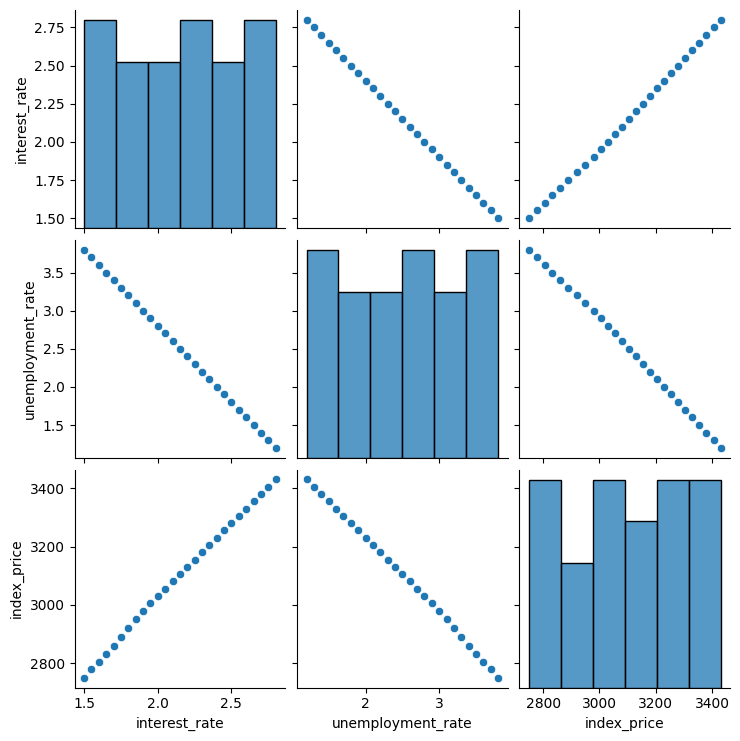

In [8]:
# we need to check whether the dependent and indepedet feature have corr relation
#Create a scatter plot
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-1.000000,0.999529
unemployment_rate,-1.000000,1.000000,-0.999529
index_price,0.999529,-0.999529,1.000000


In [10]:
# index rate increase so index_price increase
# reverse interset rate increase unemployment _rate decrease
#This means that as the unemployment_rate increases, the index_price decreases

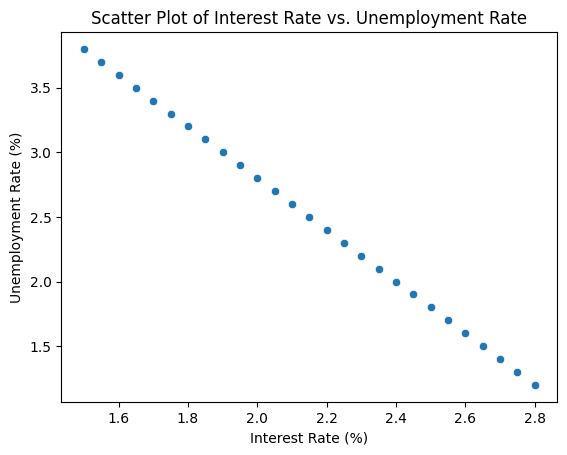

In [11]:
# we need to check whether the dependent and indepedet feature have corr relation
#Create a scatter plot
sns.scatterplot(x="interest_rate", y="unemployment_rate", data=df)

# Add titles and labels for clarity
plt.title('Scatter Plot of Interest Rate vs. Unemployment Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Unemployment Rate (%)')

# Display the plot
plt.show()

In [12]:
# Independent and dependent features
x = df[["interest_rate" ,"unemployment_rate"]] # alsways dataframe
y = df["index_price"] # series

In [13]:
# Train test split condition (fitting and overfitting condition etc)
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25 , random_state = 42) 

In [15]:
x_train.shape

(20, 2)

In [16]:
y_train.shape

(20,)

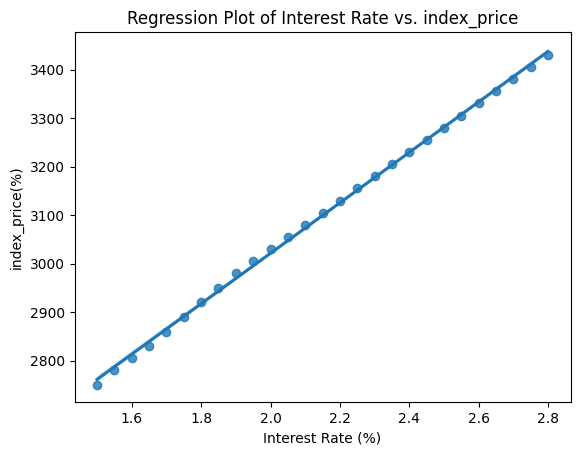

In [17]:
## a new chart(Regression plot)
sns.regplot(x='interest_rate', y='index_price', data=df)

# Add titles and labels for clarity
plt.title('Regression Plot of Interest Rate vs. index_price')
plt.xlabel('Interest Rate (%)')
plt.ylabel('index_price(%)')

# Display the plot
plt.show()

In [18]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
x_train = scaler.fit_transform(x_train)

In [20]:
x_test = scaler.transform(x_test)

In [21]:
x_train

array([[ 0.40887878, -0.40887878],
       [-0.20138806,  0.20138806],
       [ 1.26325235, -1.26325235],
       [-1.54397509,  1.54397509],
       [-1.17781499,  1.17781499],
       [-1.05576162,  1.05576162],
       [-1.42192172,  1.42192172],
       [ 0.16477205, -0.16477205],
       [ 1.01914561, -1.01914561],
       [-1.29986836,  1.29986836],
       [ 1.38530571, -1.38530571],
       [ 1.14119898, -1.14119898],
       [ 0.53093215, -0.53093215],
       [ 1.50735908, -1.50735908],
       [ 0.77503888, -0.77503888],
       [-0.81165489,  0.81165489],
       [-0.44549479,  0.44549479],
       [ 0.04271868, -0.04271868],
       [ 0.65298551, -0.65298551],
       [-0.93370826,  0.93370826]])

In [22]:
# Apply multiple Regression
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.model_selection import cross_val_score


In [26]:
## Cross Vlidation
score = cross_val_score(regression,x_train,y_train , scoring ='neg_mean_absolute_error' , cv= 3)

In [27]:
print("The average of all the 3 accuracy from cross validation is",score.mean())

The average of all the 3 accuracy from cross validation is -6.506906962343389


# Prediction o test data
## Prediction height output = intercpet +coeff_(weights)
## y_pred_test = 180.33 + 18.58(x_test)

In [28]:
y_pred = regression.predict(x_test)

In [29]:
y_pred

array([2968.25276526, 3098.11757476, 2994.22572716, 3305.90126997,
       2760.46907005, 3046.17165096, 3176.03646047])

In [30]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print("Above the error are shown")

72.21619486577286
7.652308772751245
8.498011230033345
Above the error are shown


In [31]:
from sklearn.metrics import r2_score

In [32]:
score = r2_score(y_test , y_pred)
print(score)
print("Above shows Model accrucay")

0.9972189613734495
Above shows Model accrucay


In [33]:
# ADJUSTED R SCORE
# this is based on test data
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


0.9958284420601742

In [34]:
print("Above shows Model accrucay")

Above shows Model accrucay


# PREDICTION FOR NEW DATA

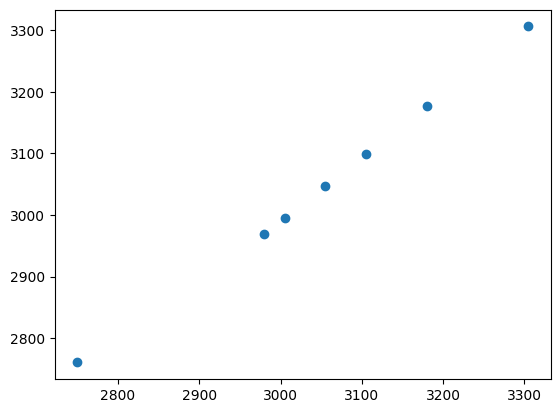

In [35]:
plt.scatter(y_test, y_pred)

In [36]:
# If there is linear realationship that means our model has performed well

In [37]:
residuals = y_test-y_pred
print(residuals)

8     11.747235
13     6.882425
9     10.774273
21    -0.901270
0    -10.469070
11     8.828349
16     3.963540
Name: index_price, dtype: float64


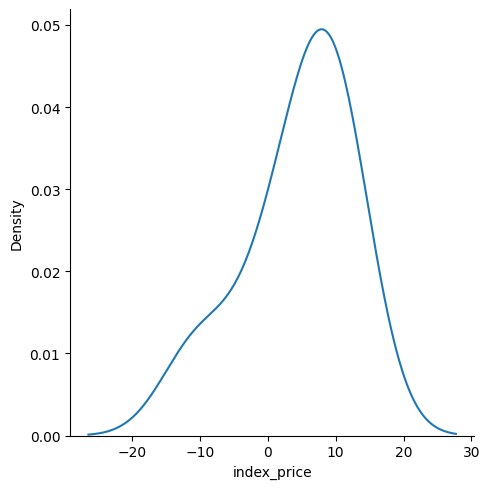

In [38]:
## plot residuals
sns.displot(residuals , kind = "kde")

In [39]:
# normal distrubution so model good

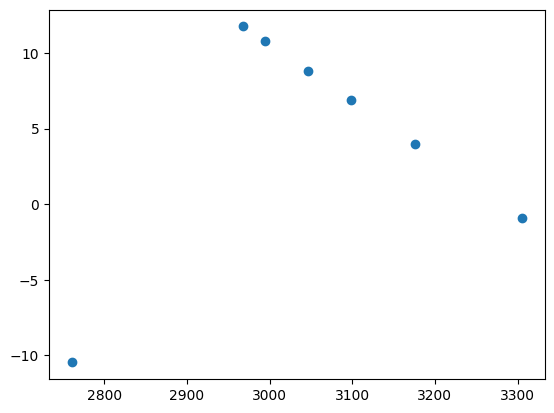

In [40]:
## scatter plot woth respect to prediction and residual
plt.scatter(y_pred,residuals)

In [41]:
# There is a problem

In [42]:
print("Remeber the formula")
print("beta 1 is =",regression.coef_)
print("intercpt is beta 0 = ", regression.intercept_)

Remeber the formula
beta 1 is = [ 106.40002241 -106.40002241]
intercpt is beta 0 =  3115.0
